In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../source/

/home/jan/Arbeitsfläche/Chempy_git/source


In [3]:
from parameter import ModelParameters
a = ModelParameters()

In [62]:
from sfr import SFR
basic_sfr = SFR(0,13.5,136)
getattr(basic_sfr, a.basic_sfr_name)(S0 = a.S_0 * a.mass_factor,a_parameter = a.a_parameter, loc = a.sfr_beginning, scale = a.sfr_scale)

these SFR functions are already implemented, see source/sfr.py
['model_A', 'gamma_function', 'prescribed', 'doubly_peaked']
the sfr sums to 1
1.0
1.0
1.0


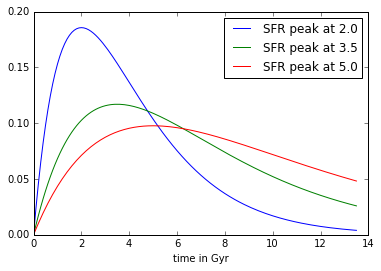

In [68]:
print 'these SFR functions are already implemented, see source/sfr.py'
print a.basic_sfr_name_list
print 'the sfr sums to 1'
for sfr_scale in [2.0,3.5,5.0]:
    basic_sfr = SFR(a.start,a.end,136)
    getattr(basic_sfr, 'gamma_function')(S0 = a.S_0 * a.mass_factor,a_parameter = a.a_parameter, loc = a.sfr_beginning, scale = sfr_scale)
    plt.plot(basic_sfr.t,basic_sfr.sfr, label = 'SFR peak at %.1f' %(sfr_scale))
    print sum(basic_sfr.sfr)*basic_sfr.dt
    plt.legend()
plt.xlabel('time in Gyr')
# These are the 1 sigma variations of the Chempy prior

In [69]:
from infall import INFALL
basic_infall = INFALL(np.copy(basic_sfr.t),np.copy(basic_sfr.sfr))
getattr(basic_infall, 'sfr_related')()

In [70]:
basic_infall.infall
# for the sfr_related infall the actual values will be calculated during the iteration.

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

1.0
0.9


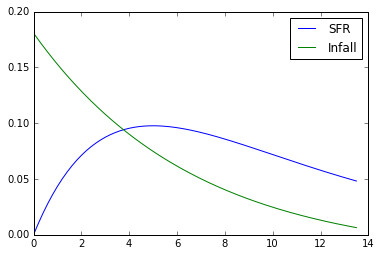

In [71]:
# But the infall can also be prescribed:
basic_infall = INFALL(np.copy(basic_sfr.t),np.copy(basic_sfr.sfr))
getattr(basic_infall, 'exponential')((10,-0.15,0.,-1.,0.9))
print sum(basic_infall.sfr)*basic_sfr.dt
print sum(basic_infall.infall)*basic_sfr.dt
plt.plot(basic_infall.t,basic_infall.sfr, label = 'SFR')
plt.plot(basic_infall.t,basic_infall.infall, label = 'Infall')
plt.legend()

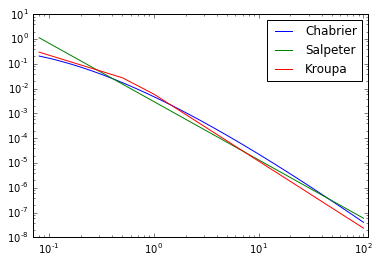

In [40]:
from imf import IMF
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.chabrier_para3,a.high_mass_slope))
plt.plot(basic_imf.x,basic_imf.dn, label ='Chabrier')
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, 'salpeter')((2.35))
plt.plot(basic_imf.x,basic_imf.dn, label = 'Salpeter')
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, 'normed_3slope')((-1.3,-2.2,-2.7,0.5,1.0))
plt.plot(basic_imf.x,basic_imf.dn, label = 'Kroupa')
plt.yscale('log')
plt.xscale('log')
plt.xlim((0.07,110))
plt.legend()

In [46]:
# Kroupa IMF mass fractions
print basic_imf.imf_mass_fraction(8.,100.)
print basic_imf.imf_mass_fraction(1.,8.)
print basic_imf.imf_mass_fraction(0.08,1.)

0.0826531531475
0.325021531915
0.59232293366


In [52]:
# Comparison to Salpeter
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, 'salpeter')((2.35))
print basic_imf.imf_mass_fraction(8.,100.)

0.12145269368


### Mass range of exploding CC-SNe
The Kroupa IMF only has 8% of stars exploding as CC-SNe whereas Salpeter has 12%.


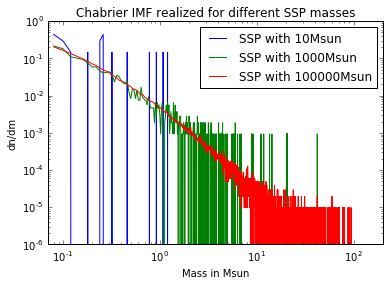

In [67]:
for item in [1e1,1e3,1e5]:
    basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
    getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.chabrier_para3,a.high_mass_slope))
    basic_imf.stochastic_sampling(item)
    plt.plot(basic_imf.x,basic_imf.dn, label ='SSP with %dMsun' %(item))
plt.title('Chabrier IMF realized for different SSP masses')
plt.yscale('log')
plt.xscale('log')
plt.xlim((0.07,200))
plt.ylabel('dn/dm')
plt.xlabel('Mass in Msun')
plt.legend()

IMF sampling
---------------
The IMF can also be realized *stochastically*. Albeit each reaslization is new and it takes more time than the analytic version.